---
title: "Manipulação da Tabela Periódica"
author: "Gustavo J. V. Meira Filho"
format:
    pdf:
        documentclass: scrreprt
        pdf-engine: xelatex
        toc: true
        toc-depth: 3
        include-in-header: 
            text: |
                \usepackage[a4paper,margin=2.5cm]{geometry}
        execute:
            echo: true     
            warning: false   
            message: false 
    html:
        code-fold: true
        code-summary: "Show Code"
        toc: true
        toc-depth: 3
execute:
    fig-format: png       
jupyter: AIChE-Internal-Challenges
---

\newpage
# **Objetivo**

> Introduzir Python, manipulação de dados e visualização.

* <span style="color: #3d9be7ff"><strong>Conceitos de programação:</strong></span> 
  * Tipos básicos (`int`, `float`, `str`, `list`, `dict`)
  * Loops
  * Funções simples.
* <span style="color: #3d9be7ff"><strong>Bibliotecas:</strong></span>  
  * `pandas` (dados tabulares) 
  * `numpy` (dados matriciais) 

* <span style="color: #3d9be7ff"><strong>Aplicações:</strong></span> 
  * Importar uma base de dados da tabela periódica (existe em CSV no Kaggle).
  * Explorar propriedades como massa atômica, eletronegatividade, número atômico.

\newpage
# Bibliotecas e Importações

In [1]:
# Nativas Python
import sys
import os

# Dados Tabulares
import pandas as pd
import numpy as np

# Visualização
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
from graphmodex import plotlymodex

import matplotlib.pyplot as plt
import seaborn as sns

\newpage

# **Pandas**

## Extração

Precisamos extrair a base de dados para conseguir trabalhar em cima dela! Para conseguirmos visualizar e manipular os dados, armazenamos ela como um objeto `pandas` que já possui tratamentos internos para vatorização e é a biblioteca coringa para todas as libs de visualização.

* [Começando na Biblioteca](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)
* [Guia do Usuário](https://pandas.pydata.org/docs/user_guide/index.html)
* [Documentação](https://pandas.pydata.org/docs/reference/index.html)

Note que a tabela periódica é um `.csv` na pasta `data`. Vamos armazenar esses dados em uma DataFrame chamada `df`

In [2]:
df = pd.read_csv(r'..\data\tabela_periodica.csv')

# Mostrar as 10 primeiras linhas das 4 primeiras colunas
df[['Name', 'Symbol', 'Atomic_Number', 'Atomic_Weight']].head(10)

,Name,Symbol,Atomic_Number,Atomic_Weight
0,Hydrogen,H,1.0,1.007940
1,Helium,He,2.0,4.002602
2,Lithium,Li,3.0,6.941000
3,Beryllium,Be,4.0,9.012182
4,Boron,B,5.0,10.811000
5,Carbon,C,6.0,12.010700
6,Nitrogen,N,7.0,14.006700
7,Oxygen,O,8.0,15.999400
8,Fluorine,F,9.0,18.998403
9,Neon,Ne,10.0,20.179700


In [3]:
# Vamos usar isso no futuro!
pivot_df = df[[
    'Name', 'Symbol', 'Atomic_Number', 'Atomic_Weight', 
    'Density', 'Melting_Point', 'Group', 'Period', 'Boiling_Point'
]].copy(deep=True)

In [4]:
# Informações sobre quantidade de inforação e tipo
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           119 non-null    object 
 1   Symbol         119 non-null    object 
 2   Atomic_Number  119 non-null    float64
 3   Atomic_Weight  118 non-null    float64
 4   Density        96 non-null     float64
 5   Melting_Point  101 non-null    float64
 6   Group          90 non-null     float64
 7   Period         119 non-null    float64
 8   Boiling_Point  95 non-null     float64
dtypes: float64(7), object(2)
memory usage: 8.5+ KB


```
# Adicionei uma nova linha vazia ao final
df.loc[len(df)] = np.nan

# Copiei os dados da linha 90 (índice 90) para a última linha
df.iloc[-1, :] = df.iloc[90, :]

# Agora estou modificando os campos desejados 
# da nova linha (índice len(df)-1)
new_idx = df.index[-1]
df.loc[new_idx, 'Name'] = 'Mentira'
df.loc[new_idx, 'Symbol'] = 'H'
df.loc[new_idx, 'Atomic_Number'] = 90
df.loc[new_idx, 'Atomic_Weight'] = 1
df.loc[new_idx, 'Density'] = 90
df.loc[new_idx, 'Melting_Point'] = np.nan

# Ordenando pelo número atômico...
df = df.sort_values(by='Atomic_Number', ascending=True)
```

In [5]:
# Principais estatísticas das colunas da tabela
df[['Atomic_Weight', 'Density', 'Melting_Point', 'Critical_Temperature']].describe()

,Atomic_Weight,Density,Melting_Point,Critical_Temperature
count,118.000000,96.000000,101.000000,21.000000
mean,143.657694,7566.863775,1296.574455,963.735238
std,89.106843,5976.321437,883.225454,1000.908102
min,1.000000,0.089900,14.010000,5.190000
25%,64.011750,2427.500000,544.450000,150.870000
50%,140.511825,7075.000000,1204.150000,416.900000
75%,225.250000,10332.500000,1811.150000,1766.000000
max,294.000000,22650.000000,3823.150000,3223.000000


In [6]:
# Colunas iniciais
print(df.shape)
print(df.columns, '\n')

# Aqui, estamos sobrescrevendo nossa tabela
# A partir dessa linha, só essas colunas estarão presentes!
df = df[[
    'Name', 'Symbol', 'Atomic_Number', 'Atomic_Weight', 
    'Density', 'Melting_Point',
]]

# Colunas finais
print(df.shape)
print(df.columns)

(119, 82)
Index(['Name', 'Symbol', 'Atomic_Number', 'Atomic_Weight', 'Density',
       'Melting_Point', 'Boiling_Point', 'Phase', 'Absolute_Melting_Point',
       'Absolute_Boiling_Point', 'Critical_Pressure', 'Critical_Temperature',
       'Heat_of_Fusion', 'Heat_of_Vaporization', 'Heat_of_Combustion',
       'Specific_Heat', 'Adiabatic_Index', 'Neel_Point',
       'Thermal_Conductivity', 'Thermal_Expansion', 'Density_Liquid',
       'Molar_Volume', 'Brinell_Hardness', 'Mohs_Hardness', 'Vickers_Hardness',
       'Bulk_Modulus', 'Shear_Modulus', 'Young_Modulus', 'Poisson_Ratio',
       'Refractive_Index', 'Speed_of_Sound', 'Valence', 'Electronegativity',
       'ElectronAffinity', 'Autoignition_Point', 'Flashpoint',
       'DOT_Hazard_Class', 'DOT_Numbers', 'EU_Number', 'NFPA_Fire_Rating',
       'NFPA_Health_Rating', 'NFPA_Reactivity_Rating', 'RTECS_Number',
       'Alternate_Names', 'Block', 'Group', 'Period', 'Electron_Configuration',
       'Color', 'Gas_phase', 'CAS_Number', 'CID_

\newpage

## Manipulação de Dados

Um interesse forte é saber como localizar linhas e colunas específicas, realizar filtros booleanos, lidar com valores ausentes e assim por diante! Aqui, trabalharemos tudo isso.

### Filtros

**Filtrar** valores é algo muito simples mas pode parecer estranho no começo. Existe um método próprio para essas operações no pandas chamado `.query`, mas também podemos fazer isso através de indexação.

In [7]:
df.query("Melting_Point <= 25")

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1.0,1.00794,0.0899,14.01
9,Neon,Ne,10.0,20.17970,0.9000,24.56


Hummm... aparentemente a temperatura está em Kelvin e não em °C. Podemos usar um conversor de unidades como o que fizemos aula passada na função `.apply(lambda x: convert_temp(x)` para irmos de K -> °C. Mas aqui, para ser mais prático, faremos de uma forma mais simples!

In [8]:
df['Melting_Point'] = round(df['Melting_Point'] - 273.15, 2)

# Vamos visualizar esses átomos
df.query("Melting_Point <= 25").head(100)

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1.0,1.007940,0.0899,-259.14
6,Nitrogen,N,7.0,14.006700,1.2510,-210.10
7,Oxygen,O,8.0,15.999400,1.4290,-218.30
8,Fluorine,F,9.0,18.998403,1.6960,-219.60
9,Neon,Ne,10.0,20.179700,0.9000,-248.59
16,Chlorine,Cl,17.0,35.453000,3.2140,-101.50
17,Argon,Ar,18.0,39.948000,1.7840,-189.30
34,Bromine,Br,35.0,79.904000,3120.0000,-7.30
35,Krypton,Kr,36.0,83.798000,3.7500,-157.36
53,Xenon,Xe,54.0,131.293000,5.9000,-111.80


In [9]:
df.query("Melting_Point <= -200 | Melting_Point >= 3000").head(100)

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1.0,1.007940,0.0899,-259.14
5,Carbon,C,6.0,12.010700,2260.0000,3550.00
6,Nitrogen,N,7.0,14.006700,1.2510,-210.10
7,Oxygen,O,8.0,15.999400,1.4290,-218.30
8,Fluorine,F,9.0,18.998403,1.6960,-219.60
9,Neon,Ne,10.0,20.179700,0.9000,-248.59
72,Tantalum,Ta,73.0,180.947900,16650.0000,3017.00
73,Tungsten,W,74.0,183.840000,19250.0000,3422.00
74,Rhenium,Re,75.0,186.207000,21020.0000,3186.00
75,Osmium,Os,76.0,190.230000,22610.0000,3033.00


In [10]:
df[
    (df["Melting_Point"] <= -200)
    | (df["Melting_Point"] >= 3000)
].head(100)

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1.0,1.007940,0.0899,-259.14
5,Carbon,C,6.0,12.010700,2260.0000,3550.00
6,Nitrogen,N,7.0,14.006700,1.2510,-210.10
7,Oxygen,O,8.0,15.999400,1.4290,-218.30
8,Fluorine,F,9.0,18.998403,1.6960,-219.60
9,Neon,Ne,10.0,20.179700,0.9000,-248.59
72,Tantalum,Ta,73.0,180.947900,16650.0000,3017.00
73,Tungsten,W,74.0,183.840000,19250.0000,3422.00
74,Rhenium,Re,75.0,186.207000,21020.0000,3186.00
75,Osmium,Os,76.0,190.230000,22610.0000,3033.00


O exemplo abaixo mostra um filtro mais complexo e, principalmente, a importância do pré-processamento dos dados. Note que os resultados que eu obtenho ao procurar por letras minúsculas e maiúsculas é diferente! Padronizar tudo minúsculo é uma boa prática na programação. Agora vem uma pergunta, para o nome do composto aplicar um `.lower` é uma boa prática, mas isso também é válido para o símbolo?

In [11]:
df[
    (
        (df["Melting_Point"] <= -200)
        | (df["Melting_Point"] >= 3000)
    )
    & (df['Name'].str.contains("o|h"))
].head(100)

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1.0,1.007940,0.0899,-259.14
5,Carbon,C,6.0,12.010700,2260.0000,3550.00
6,Nitrogen,N,7.0,14.006700,1.2510,-210.10
8,Fluorine,F,9.0,18.998403,1.6960,-219.60
9,Neon,Ne,10.0,20.179700,0.9000,-248.59
74,Rhenium,Re,75.0,186.207000,21020.0000,3186.00


In [12]:
df[
    (
        (df["Melting_Point"] <= -200)
        | (df["Melting_Point"] >= 3000)
    )
    & (df['Name'].str.contains("O|H"))
].head(100)

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1.0,1.00794,0.0899,-259.14
7,Oxygen,O,8.0,15.99940,1.4290,-218.30
75,Osmium,Os,76.0,190.23000,22610.0000,3033.00


### Pré-Processamento e Localização

Um filtro muito relevante é detectar a presença de valores ausentes `.isna`, além de duplicados, e tratá-los `.fillna`, `replace`, `.dropna`. `.drop_duplicates`.

Isso é importante pois caso nossa intenção seja tratar um modelo de regressão, por exemplo, valores ausentes não podem existir, e valores duplicados podem tendenciar nosso modelo.

In [13]:
# Agora, é possível saber exatamente quais são os valores ausentes
df[df['Density'].isna()].head(5)

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
84,Astatine,At,85.0,210.0,NaN,302.0
86,Francium,Fr,87.0,223.0,NaN,NaN
95,Americium,Am,95.0,243.0,NaN,1176.0
99,Einsteinium,Es,99.0,252.0,NaN,860.0
100,Fermium,Fm,100.0,257.0,NaN,1527.0


In [14]:
# E também os não ausentes...
df[~df['Density'].isna()].head(5)

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1.0,1.007940,0.0899,-259.14
1,Helium,He,2.0,4.002602,0.1785,NaN
2,Lithium,Li,3.0,6.941000,535.0000,180.54
3,Beryllium,Be,4.0,9.012182,1848.0000,1287.00
4,Boron,B,5.0,10.811000,2460.0000,2075.00


In [15]:
# Ok, agora temos dois símbolos H
df.query("Symbol == 'H'")

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1.0,1.00794,0.0899,-259.14
90,Mentira,H,90.0,1.00000,90.0000,NaN


In [16]:
# Só para demonstrar o replace() e o fillna()
df.loc[df["Symbol"] == "H"] = df.loc[df["Symbol"] == "H"].replace(90, np.nan)
df.loc[df["Symbol"] == "H"] = df.loc[df["Symbol"] == "H"].fillna(0)

df.query("Symbol == 'H'")

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1.0,1.00794,0.0899,-259.14
90,Mentira,H,0.0,1.00000,0.0000,0.00


In [17]:
# A importância de especificar a ordem de exclusão
# Veja que aqui a gente não está sobrescrevendo nada
df.drop_duplicates(
    subset='Symbol',
    keep='last'
).query("Symbol == 'H'")

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
90,Mentira,H,0.0,1.0,0.0,0.0


In [18]:
df = df.drop_duplicates(
    subset='Symbol',
    keep='first'
)

df.query("Symbol == 'H'")

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1.0,1.00794,0.0899,-259.14


Também podemos renomear nossas colunas e converter seus tipos.

In [19]:
# Criando uma cópia profunda
nova_df = df.copy(deep=True)

# Renomeando
nova_df = nova_df.rename(columns={
    'Symbol': 'simbolo',
    'Atomic_Number': 'n'
})

# Convertendo de float para int
nova_df['n'] = nova_df['n'].astype('Int64')
nova_df['Atomic_Weight'] = nova_df['Atomic_Weight'].round(3)

nova_df.head(5)

,Name,simbolo,n,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1,1.008,0.0899,-259.14
1,Helium,He,2,4.003,0.1785,NaN
2,Lithium,Li,3,6.941,535.0000,180.54
3,Beryllium,Be,4,9.012,1848.0000,1287.00
4,Boron,B,5,10.811,2460.0000,2075.00


\newpage 

## Análise de Dados

A análise mais simples que temos é baseada em ordenamento `.sort_index` ou `.sort_values`

In [20]:
# Vamos ordenar de outra forma
nova_df.sort_values(by='Density', ascending=False).head(5)

,Name,simbolo,n,Atomic_Weight,Density,Melting_Point
76,Iridium,Ir,77,192.217,22650.0,2466.0
75,Osmium,Os,76,190.230,22610.0,3033.0
77,Platinum,Pt,78,195.078,21090.0,1768.3
74,Rhenium,Re,75,186.207,21020.0,3186.0
93,Neptunium,Np,93,237.000,20450.0,644.0


Uma das ferramentas mais importantes da análise de dados é o agrupamento! podemos usar o `.groupby` para isso.

In [21]:
pd.DataFrame(pivot_df.groupby('Group')[
    'Melting_Point'
] \
.mean() \
.sort_values()).head(5).T

Group,18.0,17.0,1.0,16.0,12.0
Melting_Point,117.54,290.61,298.191667,437.434,507.073333


In [22]:
pd.DataFrame(pivot_df.groupby('Group')[
    'Melting_Point'
] \
.count() \
.sort_index()).head(10).T

Group,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Melting_Point,6,6,4,3,3,3,3,3,3,3


In [23]:
# A função de pivoteamento é extremamente importante!
# Aqui no pdf faremos ela somente para alguns grupos!
pivot_df.pivot_table(
    values='Symbol',
    columns='Group',
    index='Period',
    aggfunc='first'
).fillna('-').iloc[:, list(range(0, 7)) + list(range(-7, 0))]

Group,1.0,2.0,3.0,4.0,5.0,6.0,7.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
Period,,,,,,,,,,,,,,
1.0,H,-,-,-,-,-,-,-,-,-,-,-,-,He
2.0,Li,Be,-,-,-,-,-,-,B,C,N,O,F,Ne
3.0,Na,Mg,-,-,-,-,-,-,Al,Si,P,S,Cl,Ar
4.0,K,Ca,Sc,Ti,V,Cr,Mn,Zn,Ga,Ge,As,Se,Br,Kr
5.0,Rb,Sr,Y,Zr,Nb,Mo,Tc,Cd,In,Sn,Sb,Te,I,Xe
6.0,Cs,Ba,Lu,Hf,Ta,W,Re,Hg,Tl,Pb,Bi,Po,At,Rn
7.0,Fr,Ra,Lr,Rf,Db,Sg,Bh,Uub,Uut,Uuq,Uup,Uuh,Uus,Uuo


In [24]:
pivot_df['Melting_Point'] = round(pivot_df['Melting_Point'] - 273.15, 2)
pivot_df['Boiling_Point'] = round(pivot_df['Boiling_Point'] - 273.15, 2)

\newpage

### Visualizações Rápidas

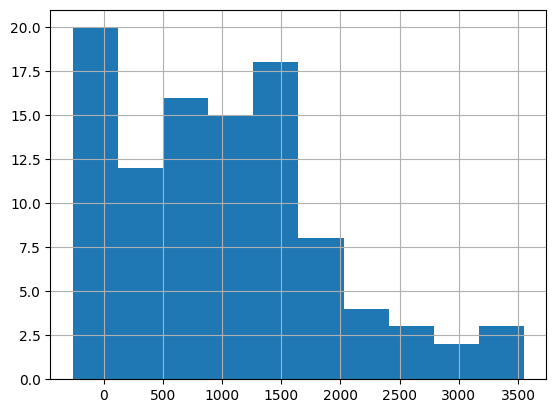

In [25]:
df['Melting_Point'].hist();

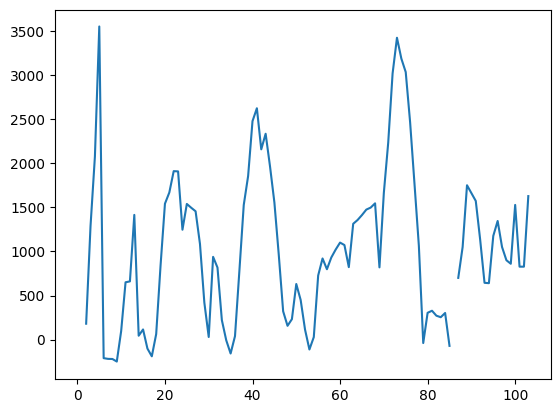

In [26]:
df['Melting_Point'].plot();

\newpage

### Merging

In [27]:
bioquimicos = pd.DataFrame({
    'Symbol': ['H', 'C', 'N', 'O', 'P', 'S', 'Na', 'K', 'Ca', 
               'Mg', 'Fe', 'Cl', 'Zn', 'Cu', 'Mn', 'Mo', 'I', 'Se'],
    'Categoria': [
        'Macronutriente', 'Macronutriente', 'Macronutriente', 'Macronutriente', 
        'Macronutriente', 'Macronutriente', 'Macronutriente', 'Macronutriente', 
        'Macronutriente', 'Macronutriente', 'Micronutriente', 'Macronutriente', 
        'Micronutriente', 'Micronutriente', 'Micronutriente', 'Micronutriente', 
        'Micronutriente', 'Micronutriente'
    ],
    'Função_Biológica': [
        'Presente na água e nas biomoléculas',  # H
        'Base estrutural das moléculas orgânicas',  # C
        'Componente de proteínas e ácidos nucleicos',  # N
        'Essencial para respiração e oxidação',  # O
        'Presente em ATP e ácidos nucleicos',  # P
        'Componente de aminoácidos e proteínas',  # S
        'Equilíbrio osmótico e potencial de ação',  # Na
        'Regulação celular e enzimática',  # K
        'Estrutura óssea e sinalização celular',  # Ca
        'Cofator enzimático e estabilização de ATP',  # Mg
        'Transporte de oxigênio e reações redox',  # Fe
        'Equilíbrio osmótico e digestão',  # Cl
        'Ativação enzimática',  # Zn
        'Transporte de elétrons e enzimas oxidases',  # Cu
        'Fotossíntese e metabolismo energético',  # Mn
        'Cofator enzimático na fixação de N',  # Mo
        'Síntese de hormônios tireoidianos',  # I
        'Antioxidante e defesa celular'  # Se
    ]
})

# bioquimicos.to_csv(r'..\data\bioquimicos.csv', index=False)

In [28]:
bioquimicos

,Symbol,Categoria,Função_Biológica
0,H,Macronutriente,Presente na água e nas biomoléculas
1,C,Macronutriente,Base estrutural das moléculas orgânicas
2,N,Macronutriente,Componente de proteínas e ácidos nucleicos
3,O,Macronutriente,Essencial para respiração e oxidação
4,P,Macronutriente,Presente em ATP e ácidos nucleicos
5,S,Macronutriente,Componente de aminoácidos e proteínas
6,Na,Macronutriente,Equilíbrio osmótico e potencial de ação
7,K,Macronutriente,Regulação celular e enzimática
8,Ca,Macronutriente,Estrutura óssea e sinalização celular
9,Mg,Macronutriente,Cofator enzimático e estabilização de ATP


In [29]:
df = pd.merge(
    df,
    bioquimicos,
    on='Symbol',
    how='left'
)

df[['Name', 'Symbol', 'Density', 'Função_Biológica']].head(10)

,Name,Symbol,Density,Função_Biológica
0,Hydrogen,H,0.0899,Presente na água e nas biomoléculas
1,Helium,He,0.1785,NaN
2,Lithium,Li,535.0000,NaN
3,Beryllium,Be,1848.0000,NaN
4,Boron,B,2460.0000,NaN
5,Carbon,C,2260.0000,Base estrutural das moléculas orgânicas
6,Nitrogen,N,1.2510,Componente de proteínas e ácidos nucleicos
7,Oxygen,O,1.4290,Essencial para respiração e oxidação
8,Fluorine,F,1.6960,NaN
9,Neon,Ne,0.9000,NaN


In [30]:
pct_bioq = 100* len(df.query('Função_Biológica.notna()')) / len(df)

print(f'''Percentual de Elementos Bioquímicos = {pct_bioq:.2f}%''')

Percentual de Elementos Bioquímicos = 15.25%


### Exportação

In [31]:
df.to_csv(r'..\data\tabela_periodica_bioquimica.csv', index=False)

\newpage

### Estatísticas Básicas

In [32]:
df[['Density', 'Melting_Point', 'Atomic_Weight']].corr()

,Density,Melting_Point,Atomic_Weight
Density,1.000000,0.561877,0.728795
Melting_Point,0.561877,1.000000,0.173819
Atomic_Weight,0.728795,0.173819,1.000000


In [56]:
df[['Density', 'Melting_Point', 'Atomic_Weight']].sample(n=5)

,Density,Melting_Point,Atomic_Weight
20,2985.0,1541.00,44.95591
58,6640.0,931.00,140.90765
11,1738.0,650.00,24.30500
86,NaN,NaN,223.00000
50,6697.0,630.63,121.76000


In [57]:
df[['Density', 'Melting_Point', 'Atomic_Weight']].sample(frac=0.02)

,Density,Melting_Point,Atomic_Weight
18,856.0,63.38,39.0983
108,NaN,NaN,268.0000


In [49]:
df[['Density', 'Melting_Point', 'Atomic_Weight']].cov()

,Density,Melting_Point,Atomic_Weight
Density,3.549540e+07,3.030047e+06,317603.833345
Melting_Point,3.030047e+06,7.800872e+05,11923.579440
Atomic_Weight,3.176038e+05,1.192358e+04,7831.537030


In [46]:
df.Categoria.value_counts(dropna=False)

Categoria
NaN               100
Macronutriente     11
Micronutriente      7
Name: count, dtype: int64

<Axes: >

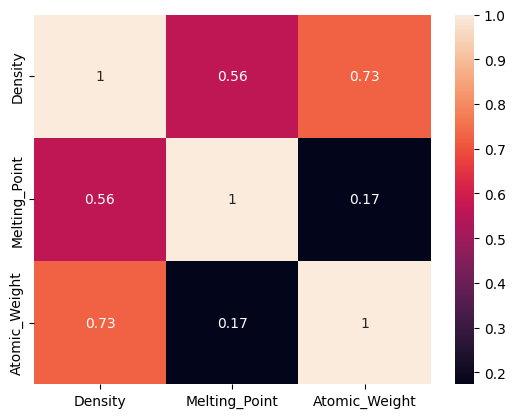

In [33]:
sns.heatmap(df[['Density', 'Melting_Point', 'Atomic_Weight']].corr(), annot=True)

Adicional: preparando os dados para trabalhar com a biblioteca numpy!

In [63]:
df.values[1:5]

array([['Helium', 'He', 2.0, 4.002602, 0.1785, nan, nan, nan],
       ['Lithium', 'Li', 3.0, 6.941, 535.0, 180.54, nan, nan],
       ['Beryllium', 'Be', 4.0, 9.012182, 1848.0, 1287.0, nan, nan],
       ['Boron', 'B', 5.0, 10.811, 2460.0, 2075.0, nan, nan]],
      dtype=object)

In [62]:
df.values[1:5].tolist()

[['Helium', 'He', 2.0, 4.002602, 0.1785, nan, nan, nan],
 ['Lithium', 'Li', 3.0, 6.941, 535.0, 180.54, nan, nan],
 ['Beryllium', 'Be', 4.0, 9.012182, 1848.0, 1287.0, nan, nan],
 ['Boron', 'B', 5.0, 10.811, 2460.0, 2075.0, nan, nan]]